# The Epitome of Salt's Sunrise Show: Murder at Karlov Manor (MKM)
## Author: Kevin Stull
## Guests: Jon, Josh, Nate 
## Card Names
https://sealeddeck.tech/sets/mkm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

c = pd.read_csv('data/MKM_Kevin_commons.csv')
u = pd.read_csv('data/MKM_Kevin_uncommons.csv')
eos = pd.concat([c, u], ignore_index=True)
eos = eos[['Name', 'Color', 'Rarity']]

# raters
raters = ['Jon', 'Josh', 'Kevin', 'Nate']

for rater in raters:
    c = pd.read_csv('data/MKM_' + rater + '_commons.csv')
    u = pd.read_csv('data/MKM_' + rater + '_uncommons.csv')
    temp = pd.concat([c, u], ignore_index=True)
    eos[rater] = temp[rater]
tier_num = {'F': 0., 'G':0., 'G+':0., 'D-': 1., 'D': 2., 'D+': 3., 
            'C-': 4., 'C': 5., 'C+': 6., 'B-': 7., 'B': 8., 'B+': 9., 
            'A-': 10., 'A': 11., 'A+': 12.}
for rater in raters:
    eos[str(rater) + '_num'] = eos[rater].map(tier_num)
eos = eos.dropna().copy()
eos

,Name,Color,Rarity,Jon,Josh,Kevin,Nate,Jon_num,Josh_num,Kevin_num,Nate_num
0,Novice Inspector,W,C,B-,C,B-,B-,7.0,5.0,7.0,7.0
1,Auspicious Arrival,W,C,C,C-,C-,D-,5.0,4.0,4.0,1.0
2,Marketwatch Phantom,W,C,C+,D,C,B-,6.0,2.0,5.0,7.0
3,Seasoned Consultant,W,C,C,D,D+,D,5.0,2.0,3.0,2.0
4,Due Diligence,W,C,D,D,D,D-,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
188,Case of the Shattered Pact,C,U,D,D+,D+,C,2.0,3.0,3.0,5.0
189,Lumbering Laundry,C,U,D,D,D+,D,2.0,2.0,3.0,2.0
190,Magnetic Snuffler,C,U,C-,D,D+,D,4.0,2.0,3.0,2.0
191,Branch of Vitu-Ghazi,L,U,C-,C+,C+,D+,4.0,6.0,6.0,3.0


# General Analysis

### Favorite Color
- Jon: Red and Blue (tie)
- Josh: Black
- Kevin: Black
- Nate: White


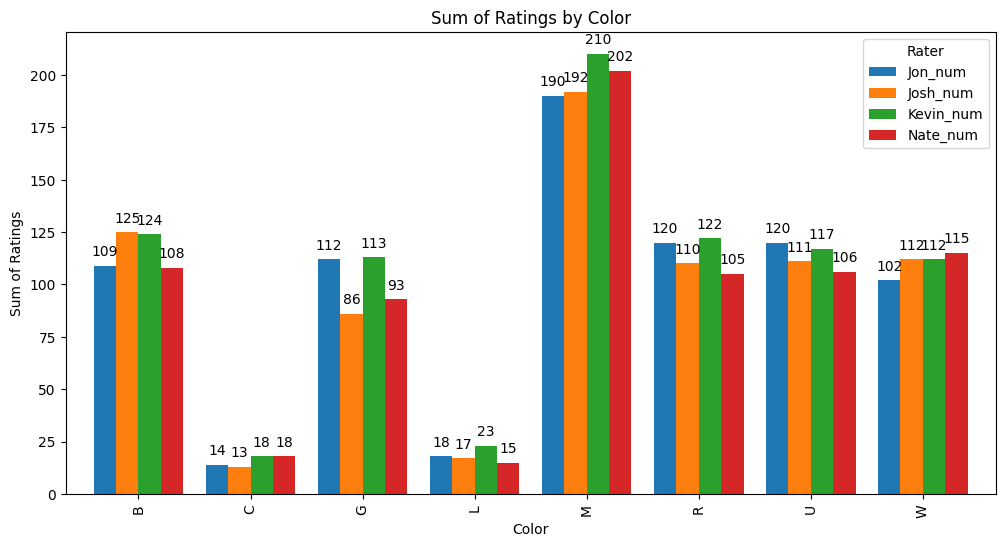

In [2]:
clean = eos.copy()
pivot_df = clean.pivot_table(index='Color', values=[rater + '_num' for rater in raters], aggfunc='sum')
ax = pivot_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Sum of Ratings by Color')
plt.xlabel('Color')
plt.ylabel('Sum of Ratings')
plt.legend(title='Rater')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Strongest Color Pairs 

In [3]:
from itertools import combinations
colors = ['W', 'R', 'B', 'U', 'G']
eos['Group'] = eos[[rater + '_num' for rater in raters]].sum(axis=1) / len(raters)
color_pairs = list(combinations(colors, 2))
color_pair_scores = {}
for pair in color_pairs:
    color1, color2 = pair
    pair_column_name = f'{color1}_{color2}_total_score'
    pair_rows = eos[(eos['Color'] == color1) | (eos['Color'] == color2)]
    total_score = pair_rows['Group'].sum()
    color_pair_scores[pair] = total_score

sorted_color_pair_scores = dict(sorted(color_pair_scores.items(), key=lambda item: item[1], reverse=True))
sorted_color_pair_scores

{('R', 'B'): 230.75,
 ('B', 'U'): 230.0,
 ('R', 'U'): 227.75,
 ('W', 'B'): 226.75,
 ('W', 'R'): 224.5,
 ('W', 'U'): 223.75,
 ('B', 'G'): 217.5,
 ('R', 'G'): 215.25,
 ('U', 'G'): 214.5,
 ('W', 'G'): 211.25}

## Nicest/ Meanest Grader
- Nicest: Kevin
- Meanest: Nate

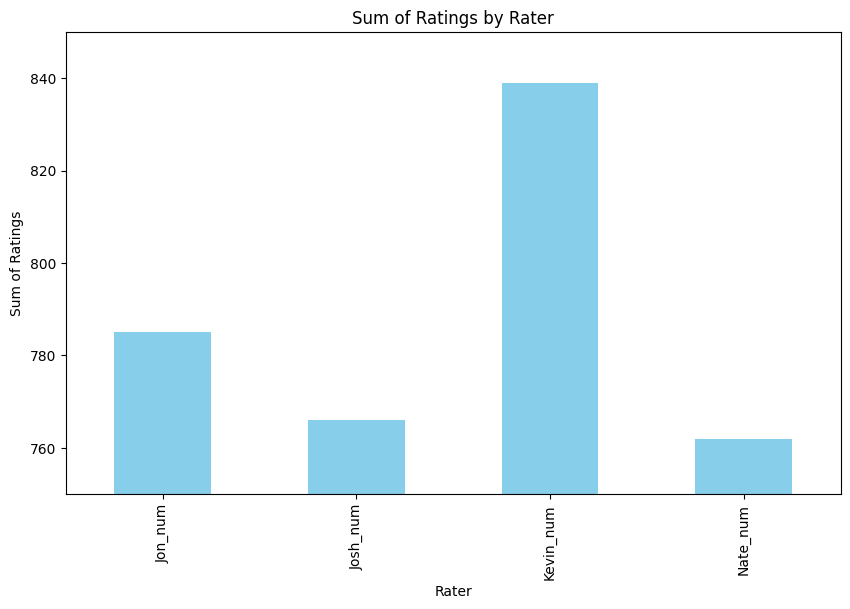

In [4]:
sum_by_rater = clean[[rater + '_num' for rater in raters]].sum()
sum_by_rater.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Sum of Ratings by Rater')
plt.xlabel('Rater')
plt.ylabel('Sum of Ratings')
plt.ylim(bottom=750, top=850)
plt.show()

## Best Commons by Color

In [5]:
eos_commons = eos[eos['Rarity'] == 'C']
top_cards_by_color = eos_commons.groupby('Color').apply(lambda x: x.nlargest(3, 'Group')).reset_index(drop=True)
print(top_cards_by_color[['Name', 'Color', 'Group']].to_string(index=False))

                  Name Color  Group
                Murder     B   7.50
Slice from the Shadows     B   5.25
  Extract a Confession     B   4.75
    Gravestone Strider     C   2.50
          Thinking Cap     C   2.00
  Sanitation Automaton     C   2.00
    Fanatical Strength     G   5.00
       Topiary Panther     G   4.75
        Tunnel Tipster     G   4.50
         Escape Tunnel     L   5.75
   Public Thoroughfare     L   4.25
     Gadget Technician     M   7.50
       Sanguine Savior     M   6.75
            Dog Walker     M   6.25
             Galvanize     R   7.75
                 Shock     R   7.25
    Person of Interest     R   5.00
     Cold Case Cracker     U   6.25
   Crimestopper Sprite     U   5.75
   Dramatic Accusation     U   5.00
      Novice Inspector     W   6.50
     Makeshift Binding     W   6.50
   Marketwatch Phantom     W   5.00


## Best Uncommons by Color


In [6]:
eos_uncommons = eos[eos['Rarity'] == 'U']
top_cards_by_color = eos_uncommons.groupby('Color').apply(lambda x: x.nlargest(3, 'Group')).reset_index(drop=True)
print(top_cards_by_color[['Name', 'Color', 'Group']].to_string(index=False))

                       Name Color  Group
               Long Goodbye     B   6.75
           Leering Onlooker     B   6.25
        Clandestine Meddler     B   6.25
 Case of the Shattered Pact     C   3.25
          Magnetic Snuffler     C   2.75
          Lumbering Laundry     C   2.25
      Hard-Hitting Question     G   7.00
          Greenbelt Radical     G   6.75
Case of the Trampled Garden     G   6.50
       Branch of Vitu-Ghazi     L   4.75
         Scene of the Crime     L   3.50
        Deadly Complication     M   8.25
            Lightning Helix     M   8.00
         Gleaming Geardrake     M   7.75
          Torch the Witness     R   6.25
         Harried Dronesmith     R   6.25
  Case of the Burning Masks     R   6.00
            Exit Specialist     U   7.00
       Surveillance Monitor     U   6.50
 Case of the Filched Falcon     U   6.25
            Not on My Watch     W   5.75
Case of the Gateway Express     W   5.50
            Karlov Watchdog     W   5.25


## Goodest Art 

In [7]:
sorted_eos = eos.sort_values(by='Group', ascending=True).copy()
print(sorted_eos[['Name', 'Group']][:3].to_string(index=False))

            Name  Group
Magnifying Glass    1.0
 Behind the Mask    1.5
 The Chase Is On    1.5


## Highest Variance

In [8]:
eos['Variance'] = eos[[rater + '_num' for rater in raters]].var(axis=1)
sorted_eos = eos.sort_values(by='Variance', ascending=False).copy()
print(sorted_eos[['Name', 'Variance']][:15].to_string(index=False))

                       Name  Variance
       Undercover Crocodelf  8.666667
                Festerleech  8.333333
       Undercity Eliminator  8.000000
              Polygraph Orb  7.583333
       Essence of Antiquity  7.333333
   Eliminate the Impossible  6.916667
             Cornered Crook  6.250000
      Suspicious Detonation  6.250000
            Coerced to Kill  5.666667
          Case File Auditor  5.666667
Case of the Trampled Garden  5.666667
  Case of the Gorgon's Kiss  5.666667
              Inside Source  5.583333
         Harried Dronesmith  4.916667
           Agency Outfitter  4.666667


## Hottest Takes 


In [9]:
for rater in raters:
    other_raters = [col for col in eos.columns if col.endswith('_num') and col != f'{rater}_num']
    eos[f'{rater}_mean'] = eos[other_raters].mean(axis=1)

for rater in raters:
    eos[f'{rater}_Hot_Take'] = abs(eos[f'{rater}_num'] - eos[f'{rater}_mean'])

for rater in raters:
    sorted_eos = eos.sort_values(by= rater + '_Hot_Take', ascending=False).copy()
    print(sorted_eos[['Name', rater + '_Hot_Take']][:3].to_string(index=False))
    print()

                 Name  Jon_Hot_Take
 Essence of Antiquity      5.333333
          Festerleech      4.666667
Suspicious Detonation      4.333333

                     Name  Josh_Hot_Take
        Case File Auditor       4.666667
Case of the Gorgon's Kiss       4.666667
      Marketwatch Phantom       4.000000

                Name  Kevin_Hot_Take
Undercover Crocodelf        5.333333
         Festerleech        4.666667
    Agency Outfitter        4.000000

                       Name  Nate_Hot_Take
       Undercity Eliminator       5.333333
Case of the Trampled Garden       4.666667
              Polygraph Orb       4.333333

